In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [7]:
print(X_train_full.shape)
X_train_full.dtype

(60000, 28, 28)


dtype('uint8')

In [8]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [16]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [38]:
#creating model using sequential layer
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers

In [29]:
hidden1=model.layers[1]
print(hidden1.name)
model.get_layer('dense') is hidden1

dense


True

In [32]:
weights,biases=hidden1.get_weights()
print(weights)
print(weights.shape)
print('_______________')
print(biases)
print(biases.shape)

[[ 0.02982322 -0.02024902  0.07007954 ... -0.04288669 -0.05633911
   0.03929733]
 [ 0.07164229  0.02937537 -0.06464086 ... -0.01903797  0.01056685
  -0.00177506]
 [-0.00892323  0.03632042 -0.06202837 ... -0.01046196  0.0343819
   0.01365709]
 ...
 [ 0.06836717 -0.07236221 -0.03951751 ... -0.06824443  0.05305183
   0.06904221]
 [-0.04993876  0.04749161  0.06745115 ... -0.03226865  0.04541937
  -0.01292995]
 [ 0.0692807  -0.06131621 -0.00195677 ...  0.00500197  0.00464994
   0.03149644]]
(784, 300)
_______________
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [40]:
#fitting the model
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

W0724 14:35:10.097310 140048053372736 deprecation.py:323] From /home/user/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.7385 - accuracy: 0.7556 - val_loss: 0.5396 - val_accuracy: 0.8160
Epoch 2/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4955 - accuracy: 0.8273 - val_loss: 0.4583 - val_accuracy: 0.8468
Epoch 3/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4484 - accuracy: 0.8424 - val_loss: 0.4350 - val_accuracy: 0.8558
Epoch 4/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4201 - accuracy: 0.8512 - val_loss: 0.3972 - val_accuracy: 0.8588
Epoch 5/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.3989 - accuracy: 0.8599 - val_loss: 0.3885 - val_accuracy: 0.8666
Epoch 6/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3829 - accuracy: 0.8665 - val_loss: 0.3680 - val_accuracy: 0.8714
Epoch 7/30
55000/55000 [==============================] -

In [51]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

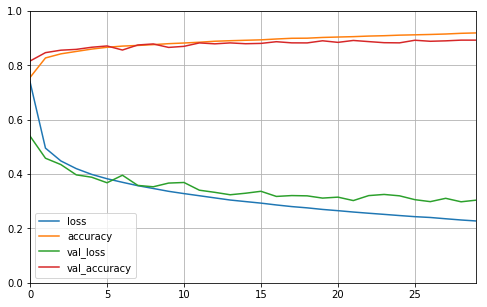

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.DataFrame(history.history)
df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [60]:
#evaluate the model
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 51us/sample - loss: 2.5734 - accuracy: 0.8377


[2.573371596515148, 0.8377]

In [76]:
#predictions
X_new=X_test[:3]
y_proba=model.predict_classes(X_new)
np.array(class_names)[y_proba]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [93]:
#new regression MLP
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()

X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)


model_regression=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model_regression.compile(loss='mean_squared_error',optimizer='sgd')
history=model_regression.fit(X_train,y_train,epochs=20,validation_data=[X_valid,y_valid])
mse_test=model_regression.evaluate(X_test,y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model_regression.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.8796 - val_loss: 1.5981
Epoch 2/20
11610/11610 [==============================] - 1s 47us/sample - loss: 1.8993 - val_loss: 0.5196
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4643 - val_loss: 0.4341
Epoch 4/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4194 - val_loss: 0.4138
Epoch 5/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4025 - val_loss: 0.4049
Epoch 6/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4040 - val_loss: 0.3981
Epoch 7/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3874 - val_loss: 0.4053
Epoch 8/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3817 - val_loss: 0.3817
Epoch 9/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3718 - val_l

In [91]:
#wide and deep NN
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,validation_data=[X_valid,y_valid])
mse_test=model.evaluate(X_test,y_test)


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.7490 - val_loss: 2.6805
Epoch 2/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.7843 - val_loss: 1010.2739
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 1s 50us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 1s 53us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 1s 45us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 47us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 1s 46us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 1s 55us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [==

In [98]:
#saving the model
model_regression.save('my_model.h5')
#loading the model
model=keras.models.load_model('my_model.h5')

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.2978
Epoch 2/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.2972
Epoch 3/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.2972
Epoch 4/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.2972
Epoch 5/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.2970
Epoch 6/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.2955
Epoch 7/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2959
Epoch 8/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.2962
Epoch 9/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2950
Epoch 10/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2961


In [101]:
#using callbacks
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
history=model.fit(X_train,y_train,epochs=10,validation_data=[X_valid,y_valid],callbacks=[checkpoint_cb])
model = keras.models.load_model("my_model.h5") # rollback to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2935 - val_loss: 0.3176
Epoch 2/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.2918 - val_loss: 0.3380
Epoch 3/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.2925 - val_loss: 0.3207
Epoch 4/10
11610/11610 [==============================] - 1s 54us/sample - loss: 0.2936 - val_loss: 0.3183
Epoch 5/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.2930 - val_loss: 0.3183
Epoch 6/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.2915 - val_loss: 0.3202
Epoch 7/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2916 - val_loss: 0.3259
Epoch 8/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.2915 - val_loss: 0.3268
Epoch 9/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2923 - val_l

In [104]:
#early stopping callbacks
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100,validation_data=[X_valid,y_valid],callbacks=[checkpoint_cb,early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.2871 - val_loss: 0.3136
Epoch 2/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.2851 - val_loss: 0.3203
Epoch 3/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.2860 - val_loss: 0.3156
Epoch 4/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.2861 - val_loss: 0.3143
Epoch 5/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2859 - val_loss: 0.3126
Epoch 6/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.2848 - val_loss: 0.3194
Epoch 7/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.2852 - val_loss: 0.3199
Epoch 8/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2856 - val_loss: 0.3207
Epoch 9/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.285

In [113]:
#tensorboard
import os
root_logdir=os.path.join(os.curdir,'my_logs')

def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m_%d_%H_%M_%S')
    return os.path.join(root_logdir,run_id)
        
run_logdir=get_run_logdir()

In [116]:
#early stopping callbacks
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit(X_train,y_train,epochs=100,validation_data=[X_valid,y_valid],callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.2786 - val_loss: 0.3087
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.2781 - val_loss: 0.3150
Epoch 3/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.2781 - val_loss: 0.3100
Epoch 4/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.2777 - val_loss: 0.3178
Epoch 5/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.2781 - val_loss: 0.3101
Epoch 6/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2773 - val_loss: 0.3075
Epoch 7/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2769 - val_loss: 0.3112
Epoch 8/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.2776 - val_loss: 0.3180
Epoch 9/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.277

Epoch 76/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.2748 - val_loss: 0.3202
Epoch 77/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.2780 - val_loss: 0.3135
Epoch 78/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2747 - val_loss: 0.3154
Epoch 79/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.2783 - val_loss: 0.3174
Epoch 80/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.2775 - val_loss: 0.3125
Epoch 81/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2756 - val_loss: 0.3121
Epoch 82/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2745 - val_loss: 0.3128
Epoch 83/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.2748 - val_loss: 0.3138
Epoch 84/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.2750 - val_loss: 0.3123
Epoch 85/100
11610/